In [1]:
! pip install joblib
! pip3 install glob2
import matplotlib.pyplot as plt
import joblib as jl
import json
import numpy as np
#import torch
import glob

#import seaborn as sns

In [15]:
"""
data = jl.load('nonlinear_rnn_v1.jl')
data_irrational = data['non_harmonics']
data_harmonics = data['harmonics']
data_extreme_indep = data['corner']
mi = data['mi']



nonlinear_viz_irrational_dir = glob.glob('modularity_logs_final_real/nonlinear_irrational_viz/*/result_dict.jl')
nonlinear_viz_rational_dir = glob.glob('modularity_logs_final_real/nonlinear_rational_viz/*/result_dict.jl')
nonlinear_viz_harmonics_dir = glob.glob('modularity_logs_final_real/nonlinear_harmonics_viz/*/result_dict.jl')


linear_viz_irrational_dir = glob.glob('modularity_logs_final_real/linear_irrational_viz/*/result_dict.jl')
linear_viz_rational_dir = glob.glob('modularity_logs_final_real/linear_rational_viz/*/result_dict.jl')
linear_viz_harmonics_dir = glob.glob('modularity_logs_final_real/linear_harmonics_viz/*/result_dict.jl')


linear_irrational_dir = glob.glob('modularity_logs_final_real/linear_irrational/*/result_dict.jl')
linear_rational_dir = glob.glob('modularity_logs_final_real/linear_rational/*/result_dict.jl')
linear_harmonics_dir = glob.glob('modularity_logs_final_real/linear_harmonics/*/result_dict.jl')
#
nonlinear_irrational_dir = glob.glob('modularity_logs_final_real/nonlinear_irrational/*/result_dict.jl')
nonlinear_rational_dir = glob.glob('modularity_logs_final_real/nonlinear_rational/*/result_dict.jl')
nonlinear_harmonics_dir = glob.glob('modularity_logs_final_real/nonlinear_harmonics/*/result_dict.jl')

def rel_fft_power(signal, freq, d=0.1, delta=0.2):
        spectrum = np.fft.fft(signal, axis=0)
        freq_list = np.fft.fftfreq(len(spectrum), d=d) * 2 * np.pi
        spectrum = spectrum[freq_list >= 0]
        freq_list = freq_list[freq_list >= 0]
        magnitude = (np.absolute(spectrum) + 1e-8)
        freq_ind = np.where(abs(freq_list - freq) <= delta)[0]

        return sum(magnitude[freq_ind]) / sum(magnitude)
    
def MI(nm_matrix):
    n, m = nm_matrix.shape
    a = 0
    for i in range(n):
        a += np.max(nm_matrix[i])

    return (a / np.sum(nm_matrix) - 1 / m) / (1 - 1 / m)

def collect_mi(irrational_dir, rational_dir, harmonics_dir, loss_thres):
    mi= {}
    
    def compute_mi(signal, kf1, kf2):
        mat = []
        for i in range(signal.shape[-1]):
            rel_fft_kf1= rel_fft_power(signal[0, :, i] - np.mean(signal[0, :, i]),
                            kf1,
                            delta=0.2)
            rel_fft_kf2=rel_fft_power(signal[0, :, i] - np.mean(signal[0, :, i]),
                            kf2,
                            delta=0.2)

            mat.append([rel_fft_kf1, rel_fft_kf2])
        
        return MI(np.array(mat))             

    def _gather(loss_thres, logdir):
        mi_list = []
        for p in logdir:
            if loss_thres is not None:

                if jl.load(p)['total_loss'] < loss_thres:
                    if '_rational' in p:
                        
                        if max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq']) != int (max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq'])):
                            #print(compute_mi(jl.load(p)['hs'], *jl.load(p)['key_freq']), jl.load(p)['total_loss'], jl.load(p)['aictivity_loss'], jl.load(p)['weight_loss'],jl.load(p)['pred_loss'])
                            #mi_list.append(compute_mi(jl.load(p)['hs'], *jl.load(p)['key_freq']))
                            print(jl.load(p)['key_freq'], jl.load(p)['MI_power'], max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq']) )
                            mi_list.append(jl.load(p)['MI_power'])
                    else:
                        print(jl.load(p)['key_freq'], jl.load(p)['MI_power'], max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq']) )
                        mi_list.append(jl.load(p)['MI_power'])
            else:
                if '_rational' in p:
        
                    if max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq']) != int (max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq'])):
                        print(jl.load(p)['key_freq'], jl.load(p)['MI_power'], max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq']) )
                        #mi_list.append(compute_mi(jl.load(p)['hs'], *jl.load(p)['key_freq']))
                        mi_list.append(jl.load(p)['MI_power'])
                else:
                    #mi_list.append(jl.load(p)['MI_power'])
                    print(jl.load(p)['key_freq'], jl.load(p)['MI_power'], max(jl.load(p)['key_freq'])/min(jl.load(p)['key_freq']) )
                    mi_list.append(jl.load(p)['MI_power'])

        return mi_list[:10]

    print('Irrational')
    mi['irrational'] = _gather(loss_thres, irrational_dir)
    print('Rational')
    mi['rational'] = _gather(loss_thres, rational_dir)
    print('Harmonics')
    mi['harmonics'] = _gather(loss_thres, harmonics_dir)
    
    return mi

print('Collect nonlinear')
mi_nonlin = collect_mi(nonlinear_irrational_dir, nonlinear_rational_dir, nonlinear_harmonics_dir, None)
print('Collect linear')
mi_lin = collect_mi(linear_irrational_dir, linear_rational_dir, linear_harmonics_dir, None)

"""

"\ndata = jl.load('nonlinear_rnn_v1.jl')\ndata_irrational = data['non_harmonics']\ndata_harmonics = data['harmonics']\ndata_extreme_indep = data['corner']\nmi = data['mi']\n\n\n\nnonlinear_viz_irrational_dir = glob.glob('modularity_logs_final_real/nonlinear_irrational_viz/*/result_dict.jl')\nnonlinear_viz_rational_dir = glob.glob('modularity_logs_final_real/nonlinear_rational_viz/*/result_dict.jl')\nnonlinear_viz_harmonics_dir = glob.glob('modularity_logs_final_real/nonlinear_harmonics_viz/*/result_dict.jl')\n\n\nlinear_viz_irrational_dir = glob.glob('modularity_logs_final_real/linear_irrational_viz/*/result_dict.jl')\nlinear_viz_rational_dir = glob.glob('modularity_logs_final_real/linear_rational_viz/*/result_dict.jl')\nlinear_viz_harmonics_dir = glob.glob('modularity_logs_final_real/linear_harmonics_viz/*/result_dict.jl')\n\n\nlinear_irrational_dir = glob.glob('modularity_logs_final_real/linear_irrational/*/result_dict.jl')\nlinear_rational_dir = glob.glob('modularity_logs_final_real

In [14]:
linec_irrational = '#0072B2'
linec_rational = '#CC79A7'
linec_harmonics = '#009E73'

def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

def divide_ax(ax, n, place='bottom', pad = 0.05):
    from mpl_toolkits.axes_grid1 import make_axes_locatable

    divider = make_axes_locatable(ax)
    ax_list = []
    for _ in range(n):
        ax_ = divider.append_axes(place, size='100%', pad=pad)
        fig1 = ax.get_figure()
        fig1.add_axes(ax_)
        ax_list.append(ax_)
    return ax, *ax_list


def get_data_plot(lin, nonlin):

    def _get_most_mixed_id(data):
        rel_power = data['rel_power']
        hs = data['hs'].squeeze()
        fft=data['fft']
        mixed_neuron_power= abs(np.diff(rel_power, axis=1))
        mixed_neuron_power_nonzero = np.where(mixed_neuron_power > 1e-2 )[0]
        mixed_neuron_most = np.sort(mixed_neuron_power[mixed_neuron_power_nonzero.squeeze()])[0]
        mixed_neuron_id = np.where(mixed_neuron_power == mixed_neuron_most)[0][0]

        return mixed_neuron_id, hs[:,mixed_neuron_id], fft[mixed_neuron_id]

    y = nonlin['y']
    #hs_lin = lin['hs'].squeeze()
    #hs_nonlin = nonlin['hs'].squeeze()

    fft_freq = nonlin['fft_freq']
    #lin_fft = np.array(lin['fft'])
    #nonlin_fft = np.array(nonlin['fft'])
    
    lin_power = np.array(lin['rel_power'])
    nonlin_power = np.array(nonlin['rel_power'])
    key_freq = nonlin['key_freq']

    lin_mixed_neuron_id, lin_mixed_x, lin_mixed_fft = _get_most_mixed_id(lin)

    nonlin_mixed_neuron_id, nonlin_mixed_x, nonlin_mixed_fft = _get_most_mixed_id(nonlin)

    return {'lin' : {'y': y, 'mixed_x': lin_mixed_x, 'mixed_fft':np.real(lin_mixed_fft), 'fft_freq': fft_freq, 'rel_power': lin_power, },'nonlin' : {'y': y, 'mixed_x': nonlin_mixed_x, 'mixed_fft':np.real(nonlin_mixed_fft), 'fft_freq': fft_freq, 'rel_power': nonlin_power,}} 


    

In [12]:
data= jl.load('rnn_figure_final.jl')
irrational_plot= data['viz_panel']['irrational']
rational_plot = data['viz_panel']['rational']
harmonics_plot = data['viz_panel']['harmonics']

mi_lin = data['mi_plot']['linear']
mi_nonlin=data['mi_plot']['non_linear']

"""
lin_irrational = jl.load(linear_viz_irrational_dir[2])
lin_rational = jl.load(linear_viz_rational_dir[0])
lin_harmonics= jl.load(linear_viz_harmonics_dir[0])

nonlin_irrational = jl.load(nonlinear_viz_irrational_dir[2])
nonlin_rational = jl.load(nonlinear_viz_rational_dir[3])
nonlin_harmonics= jl.load(nonlinear_viz_harmonics_dir[1])

irrational_plot = get_data_plot(lin_irrational, nonlin_irrational)
rational_plot = get_data_plot(lin_rational, nonlin_rational)
harmonics_plot = get_data_plot(lin_harmonics, nonlin_harmonics)
"""
    

'\nlin_irrational = jl.load(linear_viz_irrational_dir[2])\nlin_rational = jl.load(linear_viz_rational_dir[0])\nlin_harmonics= jl.load(linear_viz_harmonics_dir[0])\n\nnonlin_irrational = jl.load(nonlinear_viz_irrational_dir[2])\nnonlin_rational = jl.load(nonlinear_viz_rational_dir[3])\nnonlin_harmonics= jl.load(nonlinear_viz_harmonics_dir[1])\n\nirrational_plot = get_data_plot(lin_irrational, nonlin_irrational)\nrational_plot = get_data_plot(lin_rational, nonlin_rational)\nharmonics_plot = get_data_plot(lin_harmonics, nonlin_harmonics)\n'

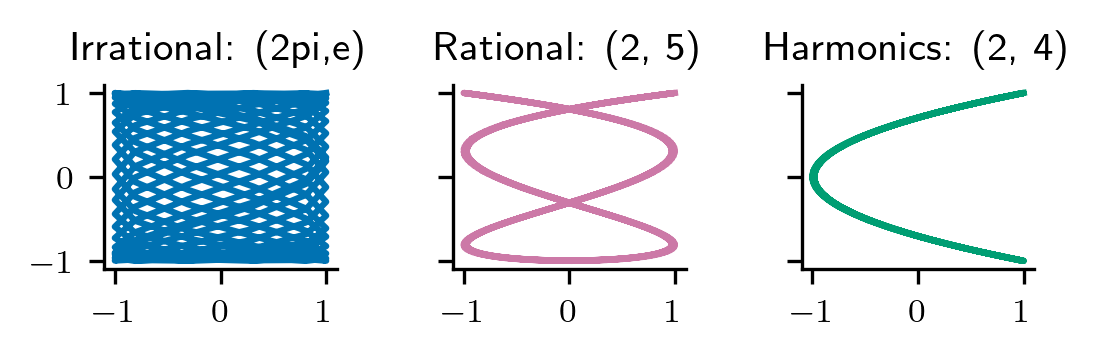

In [4]:
from matplotlib.gridspec import GridSpec

plt.rcParams['text.usetex'] = True
plt.rcParams['font.size'] = 8

def format_axes(fig):
    for i, ax in enumerate(fig.axes):
        #ax.text(0.5, 0.5, "ax%d" % (i+1), va="center", ha="center")
        #ax.tick_params(labelbottom=False, labelleft=False)
        ax.spines['right'].set_visible(False)
        ax.spines['top'].set_visible(False)
        ax.xaxis.set_major_locator(plt.MaxNLocator(2))
        ax.yaxis.set_major_locator(plt.MaxNLocator(2))



fig, (ax_irrational, ax_rational, ax_harmonics) = plt.subplots(1,3,figsize= (4,0.8), dpi=300, sharey= True)
plt.subplots_adjust(wspace=0.5)


line_c = 'purple'
ax_irrational.plot(irrational_plot['lin']['y'][0,:,0], irrational_plot['lin']['y'][0,:,1], c=linec_irrational )
ax_irrational.set_title('Irrational: (2pi,e)', )

ax_harmonics.plot(harmonics_plot['lin']['y'][0,:,0], harmonics_plot['lin']['y'][0,:,1],c=linec_harmonics)
ax_harmonics.set_title('Harmonics: (2, 4)', )

ax_rational.plot(rational_plot['lin']['y'][0,:,0], rational_plot['lin']['y'][0,:,1], c=linec_rational)
ax_rational.set_title('Rational: (2, 5)', )

format_axes(fig)





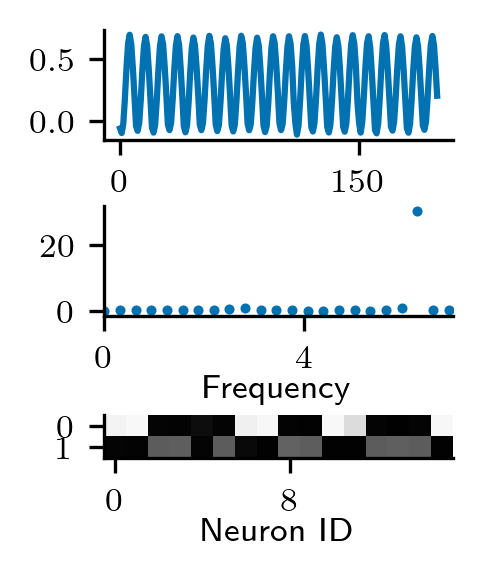

In [5]:

fig, (ax_irrational_lin_x, ax_irrational_lin_fft, ax_irrational_lin_mi) = plt.subplots(3,1, figsize=(1.5,2), dpi = 300, gridspec_kw={'height_ratios': [1,1, 1]})
plt.subplots_adjust(hspace = 0.6)


ax_irrational_lin_x.plot(irrational_plot['lin']['mixed_x'], c= linec_irrational)
#ax_irrational_lin_x.set_xlabel('Time (0.1s)', labelpad=-1,)

ax_irrational_lin_fft.scatter(irrational_plot['lin']['fft_freq'], abs(irrational_plot['lin']['mixed_fft']), s = 2, c= linec_irrational)
ax_irrational_lin_fft.set_xlim(0,7)
ax_irrational_lin_fft.set_xlabel('Frequency', labelpad=0.1)

l=ax_irrational_lin_mi.imshow(irrational_plot['lin']['rel_power'].T, cmap = 'Greys_r', vmin = 0, vmax= .8)
#ax_irrational_lin_mi.set_yticks(np.arange(2),['f1', 'f2'],rotation = 45, fontsize=7)
ax_irrational_lin_mi.set_xlabel('Neuron ID', labelpad=0.1)
format_axes(fig)


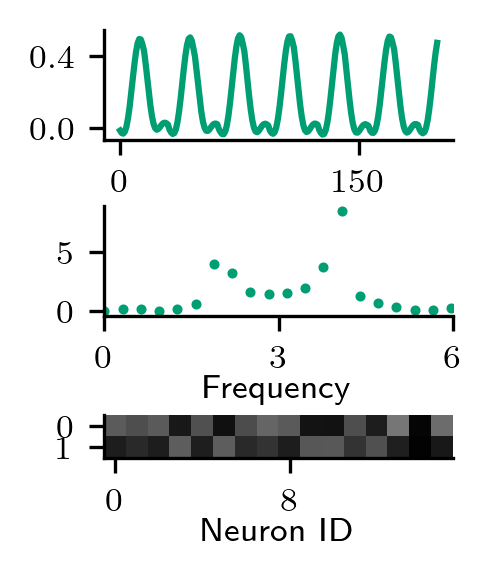

In [6]:


fig, (ax_harmonics_lin_x, ax_harmonics_lin_fft, ax_harmonics_lin_mi) = plt.subplots(3,1, figsize=(1.5,2), dpi = 300, gridspec_kw={'height_ratios': [1,1, 1]})
plt.subplots_adjust(hspace = 0.6,)


ax_harmonics_lin_x.plot(harmonics_plot['lin']['mixed_x'], c= linec_harmonics)
#ax_harmonics_lin_x.set_xlabel('Time (0.1s)', labelpad=-1,)

ax_harmonics_lin_fft.scatter(harmonics_plot['lin']['fft_freq'], abs(harmonics_plot['lin']['mixed_fft']), s = 2, c= linec_harmonics)
ax_harmonics_lin_fft.set_xlim(0,6)
ax_harmonics_lin_fft.set_xlabel('Frequency', labelpad=0.1)

l=ax_harmonics_lin_mi.imshow(harmonics_plot['lin']['rel_power'].T, cmap = 'Greys_r', vmin = 0, vmax= 1)
#ax_irrational_lin_mi.set_yticks(np.arange(2),['f1', 'f2'],rotation = 45, fontsize=7)
ax_harmonics_lin_mi.set_xlabel('Neuron ID', labelpad=0.1)
format_axes(fig)

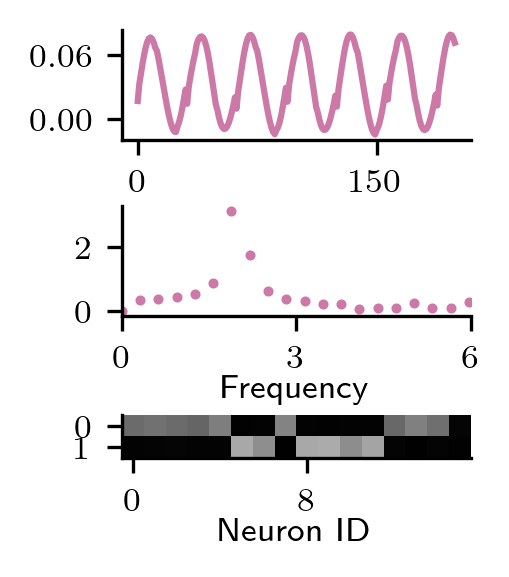

In [7]:


fig, (ax_rational_lin_x, ax_rational_lin_fft, ax_rational_lin_mi) = plt.subplots(3,1, figsize=(1.5,2), dpi = 300, gridspec_kw={'height_ratios': [1,1, 1]})
plt.subplots_adjust(hspace = 0.6)


ax_rational_lin_x.plot(rational_plot['lin']['mixed_x'], c= linec_rational)
#ax_rational_lin_x.set_xlabel('Time (0.1s)', labelpad=-1,)

ax_rational_lin_fft.scatter(rational_plot['lin']['fft_freq'], abs(rational_plot['lin']['mixed_fft']), s = 2, c= linec_rational)
ax_rational_lin_fft.set_xlim(0,6)
ax_rational_lin_fft.set_xlabel('Frequency', labelpad=0.1)

l=ax_rational_lin_mi.imshow(rational_plot['lin']['rel_power'].T, cmap = 'Greys_r', vmin = 0, vmax= 1)
#ax_irrational_lin_mi.set_yticks(np.arange(2),['f1', 'f2'],rotation = 45, fontsize=7)
ax_rational_lin_mi.set_xlabel('Neuron ID', labelpad=0.1)
format_axes(fig)

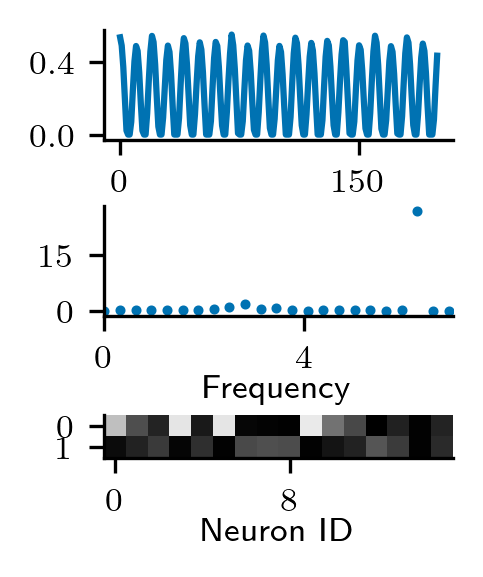

In [8]:

    
fig, (ax_irrational_nonlin_x, ax_irrational_nonlin_fft, ax_irrational_nonlin_mi) = plt.subplots(3,1, figsize=(1.5,2), dpi = 300, gridspec_kw={'height_ratios': [1,1, 1]})
plt.subplots_adjust(hspace = 0.6)

ax_irrational_nonlin_x.plot(irrational_plot['nonlin']['mixed_x'], c= linec_irrational)
#ax_irrational_nonlin_x.set_xlabel('Time (0.1s)', labelpad=-1,)

ax_irrational_nonlin_fft.scatter(irrational_plot['nonlin']['fft_freq'], abs(irrational_plot['nonlin']['mixed_fft']), s = 2, c= linec_irrational)
ax_irrational_nonlin_fft.set_xlim(0,7)
ax_irrational_nonlin_fft.set_xlabel('Frequency', labelpad=0.1)

l=ax_irrational_nonlin_mi.imshow(irrational_plot['nonlin']['rel_power'].T, cmap = 'Greys_r', vmin = 0, vmax= 1)
#ax_irrational_lin_mi.set_yticks(np.arange(2),['f1', 'f2'],rotation = 45, fontsize=7)
ax_irrational_nonlin_mi.set_xlabel('Neuron ID', labelpad=0.1)
format_axes(fig)


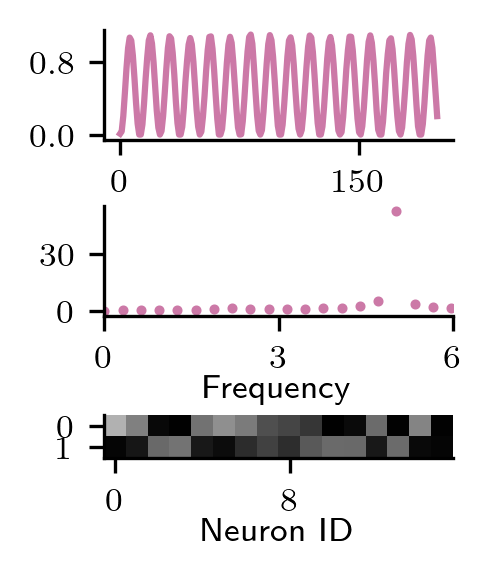

In [9]:

fig, (ax_rational_nonlin_x, ax_rational_nonlin_fft, ax_rational_nonlin_mi) = plt.subplots(3,1, figsize=(1.5,2), dpi = 300, gridspec_kw={'height_ratios': [1,1, 1]})
plt.subplots_adjust(hspace = 0.6)


ax_rational_nonlin_x.plot(rational_plot['nonlin']['mixed_x'], c= linec_rational)
#ax_rational_nonlin_x.set_xlabel('Time (0.1s)', labelpad=-1,)

ax_rational_nonlin_fft.scatter(rational_plot['nonlin']['fft_freq'], abs(rational_plot['nonlin']['mixed_fft']), s = 2, c= linec_rational)
ax_rational_nonlin_fft.set_xlim(0,6)
ax_rational_nonlin_fft.set_xlabel('Frequency', labelpad=0.1)

l=ax_rational_nonlin_mi.imshow(rational_plot['nonlin']['rel_power'].T, cmap = 'Greys_r', vmin = 0, vmax= 1)
#ax_irrational_lin_mi.set_yticks(np.arange(2),['f1', 'f2'],rotation = 45, fontsize=7)
ax_rational_nonlin_mi.set_xlabel('Neuron ID', labelpad=0.1)
format_axes(fig)


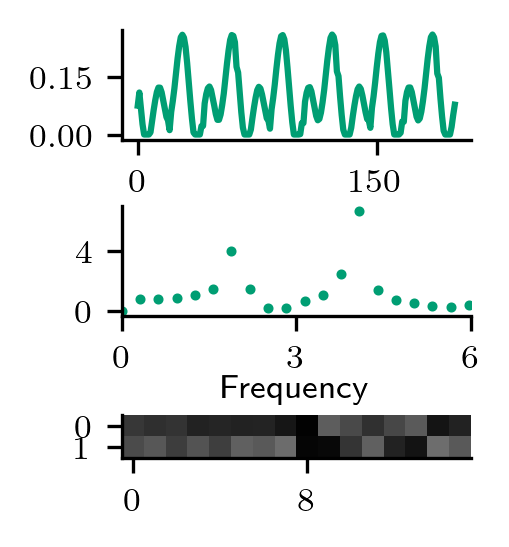

In [10]:



fig, (ax_harmonics_nonlin_x, ax_harmonics_nonlin_fft, ax_harmonics_nonlin_mi) = plt.subplots(3,1, figsize=(1.5,2), dpi = 300, gridspec_kw={'height_ratios': [1,1, 1]})
plt.subplots_adjust(hspace = 0.6)


ax_harmonics_nonlin_x.plot(harmonics_plot['nonlin']['mixed_x'], c= linec_harmonics)
#ax_harmonics_nonlin_x.set_xlabel('Time (0.1s)', labelpad=-1,)

ax_harmonics_nonlin_fft.scatter(harmonics_plot['nonlin']['fft_freq'], abs(harmonics_plot['nonlin']['mixed_fft']), s = 2, c= linec_harmonics)
ax_harmonics_nonlin_fft.set_xlim(0,6)
ax_harmonics_nonlin_fft.set_xlabel('Frequency', labelpad=0.1)

l=ax_harmonics_nonlin_mi.imshow(harmonics_plot['nonlin']['rel_power'].T, cmap = 'Greys_r', vmin = 0, vmax= 1)
#ax_irrational_lin_mi.set_yticks(np.arange(2),['f1', 'f2'],rotation = 45, fontsize=7)
ax_irrational_nonlin_mi.set_xlabel('Neuron ID', labelpad=0.1)
format_axes(fig)


irrational 9
rational 10
harmonics 8


[Text(0, 0, 'irrational'), Text(1, 0, 'rational'), Text(2, 0, 'harmonics')]

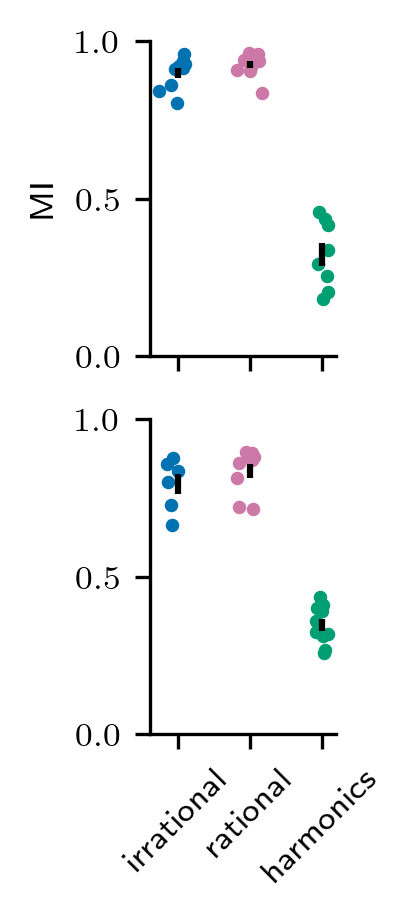

In [13]:

#fig, (ax_lin, ax_nonlin) = plt.subplots(1,2, figsize=(3,2), sharey=True, dpi=300)
fig, (ax_lin, ax_nonlin) = plt.subplots(2,1, figsize=(0.8,3), sharex=True, dpi=300)


for i in range(len(mi_lin)):
    k = list(mi_lin.keys())[i]
    
    n_item = len(mi_lin[k])
    print(k, n_item)
    ax_lin.scatter(np.ones(n_item) * i+ np.random.normal( 0,  0.1, size=n_item,), np.array(mi_lin[k]), s=5, c=eval('linec_'+k))
    ax_lin.errorbar(i, np.mean(mi_lin[k]), np.std(mi_lin[k])/np.sqrt(n_item), c= 'k', barsabove = True, fmt = '-')
    ax_lin.set_ylim(0,1)
    ax_lin.set_ylabel('MI')

for i in range(len(mi_nonlin)):
    k = list(mi_nonlin.keys())[i]
    n_item = len(mi_nonlin[k])
    ax_nonlin.scatter(np.ones(n_item) * i+ np.random.normal( 0,  0.1, size=n_item,), np.array(mi_nonlin[k]),s=5, c=eval('linec_'+k))#
    ax_nonlin.errorbar(i, np.mean(mi_nonlin[k]), np.std(mi_nonlin[k])/np.sqrt(n_item), c= 'k', barsabove = True, fmt = '-')
    ax_nonlin.set_ylim(0,1)


format_axes(fig)


ax_lin.set_xticks( np.arange(3))
ax_lin.set_xticklabels(list(mi_nonlin.keys()), rotation = 45)
ax_nonlin.set_xticks( np.arange(3))
ax_nonlin.set_xticklabels(list(mi_nonlin.keys()), rotation = 45)